## Notebook import

In [33]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import log
import numpy as np
%matplotlib inline


## Gather data

In [3]:
boston_dataset = load_boston()
boston_dataset.DESCR

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## Data exploration with pandas datafram

In [4]:
#creating a pandas dataframe
data = pd.DataFrame(data= boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICES'] = boston_dataset.target
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## cleaning data- checking for missing values


In [5]:
 #data.info()

## visualizing data- histogram distribution and bar chart

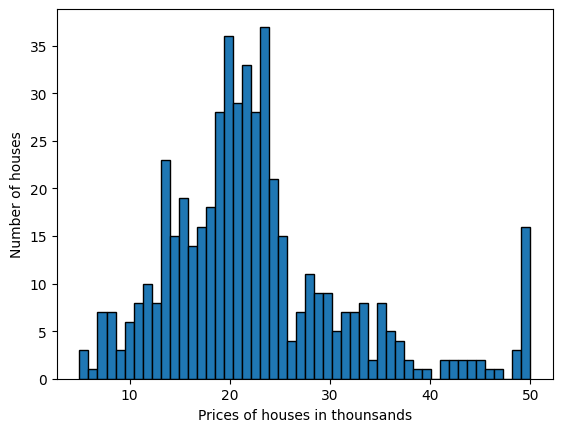

In [6]:

plt.hist(data['PRICES'], bins=50, ec='black')
plt.xlabel('Prices of houses in thounsands')
plt.ylabel('Number of houses')
plt.show()

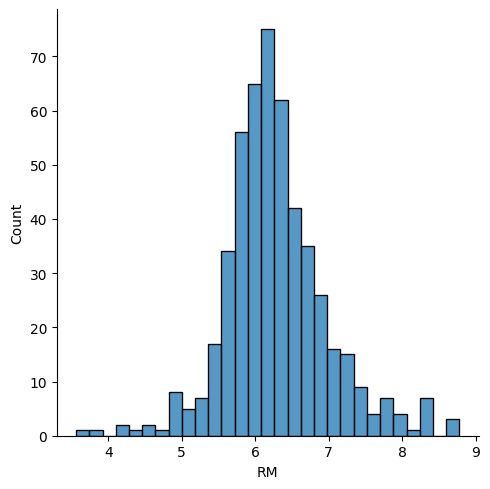

In [7]:
sns.displot(data['RM'], )
plt.show()

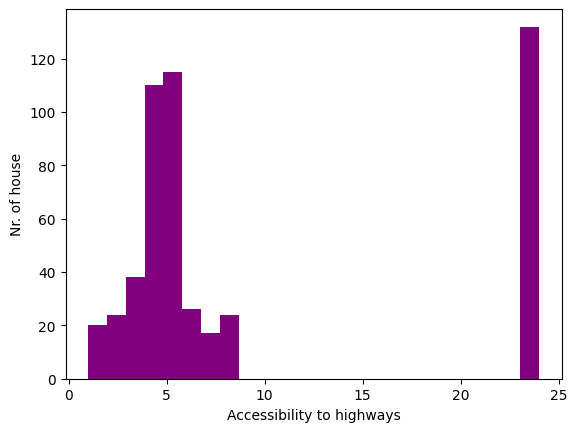

In [8]:

plt.hist(data['RAD'],bins=24, color='purple')
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of house')
plt.show()

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')


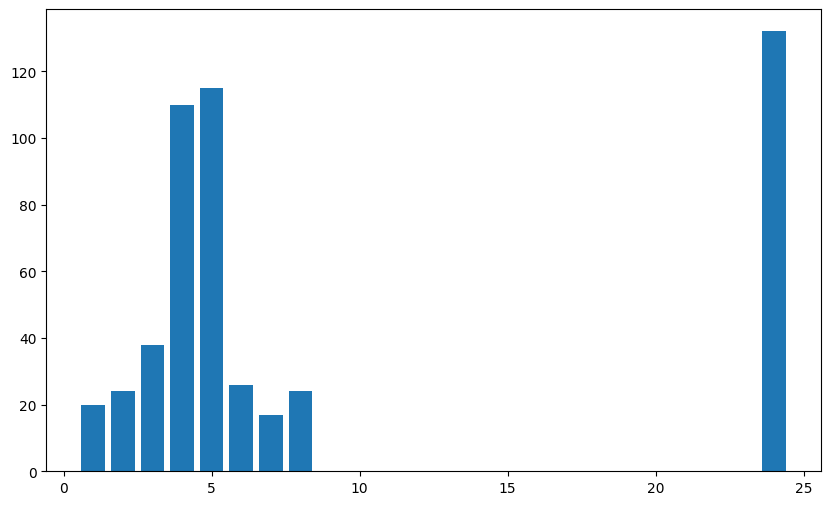

In [9]:
## creating a bar chart
plt.figure(figsize=(10,6))
frequency = data['RAD'].value_counts()
print(frequency.index) 
plt.bar(frequency.index,frequency)
plt.show()


In [10]:
print(data['CHAS'].value_counts())

0.0    471
1.0     35
Name: CHAS, dtype: int64


## Correlation
### $$ \rho _{XY} =CORR(X,Y) $$
### $$ -1.0 \leq \rho _{XY} \leq + 1.0 $$ 

In [11]:
data['PRICES'].corr(data['PTRATIO'])

-0.5077866855375618

In [12]:
 #visualizing correlations with heat map
 #creatin an array of 0 like another

mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

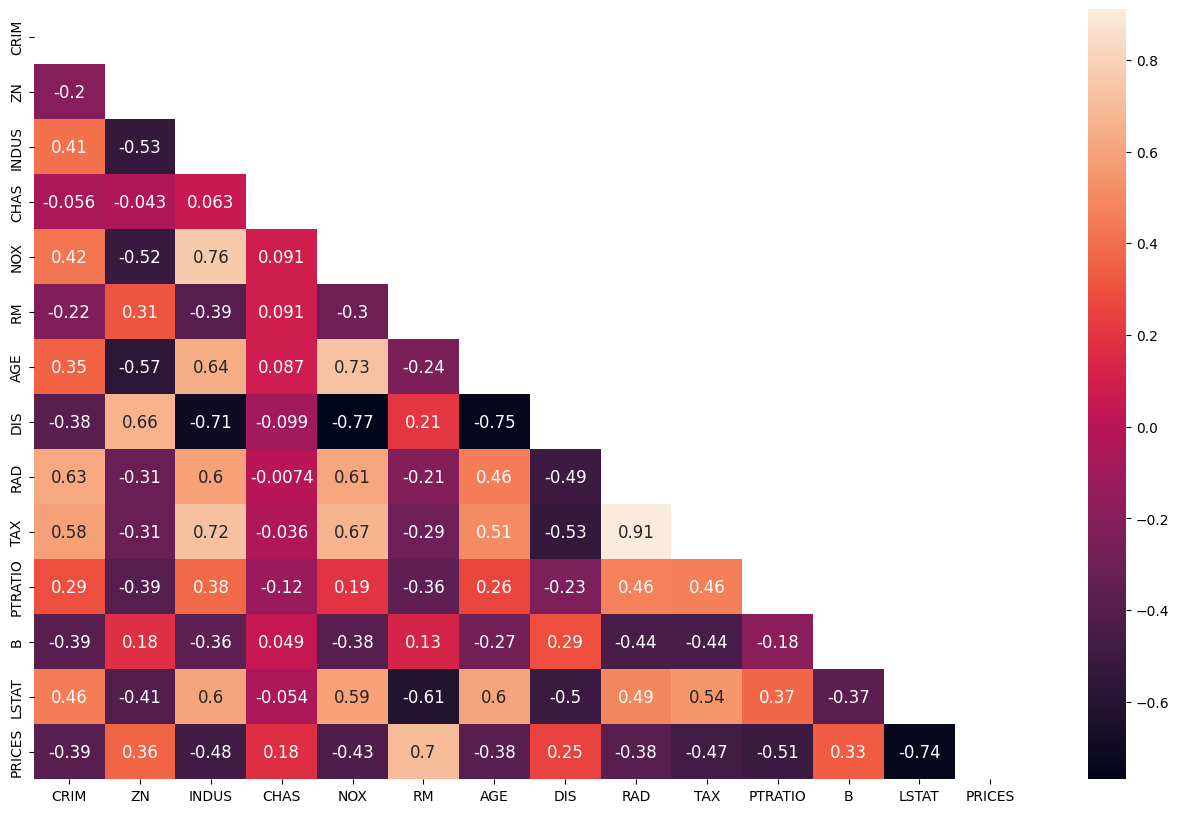

In [13]:
#creating heat map
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws={'size':12})
plt.show()

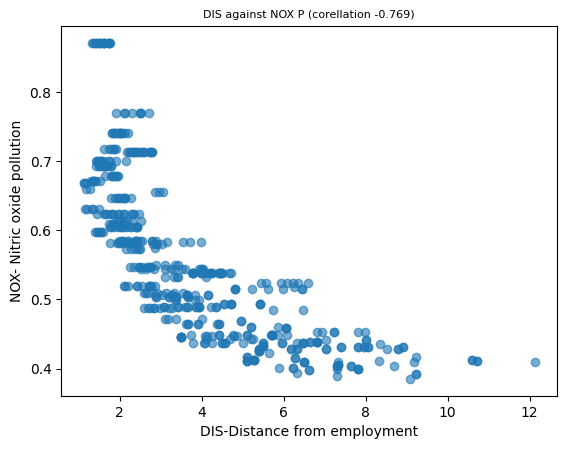

In [14]:
dis_noxcorr= round(data['DIS'].corr(data['NOX']), 3)
plt.scatter(data['DIS'], data['NOX'],alpha= 0.6)
plt.xlabel('DIS-Distance from employment')
plt.title(f'DIS against NOX P (corellation {dis_noxcorr})',fontsize = 8)
plt.ylabel('NOX- Nitric oxide pollution')
plt.show()

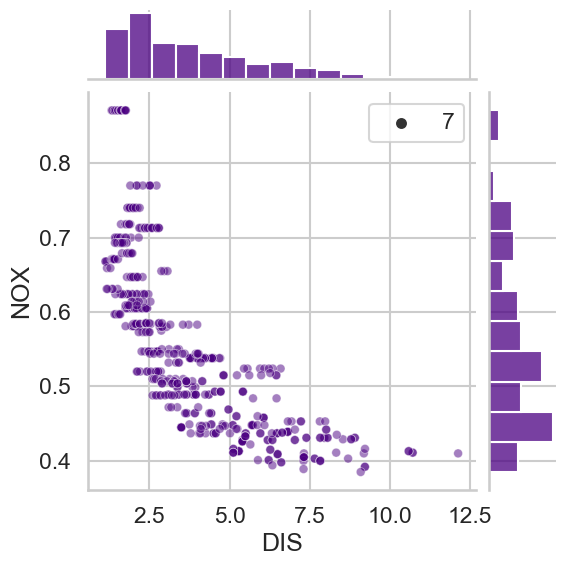

In [15]:
# using seaborn module
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='indigo', size=7,joint_kws={'alpha':0.5})
plt.show()

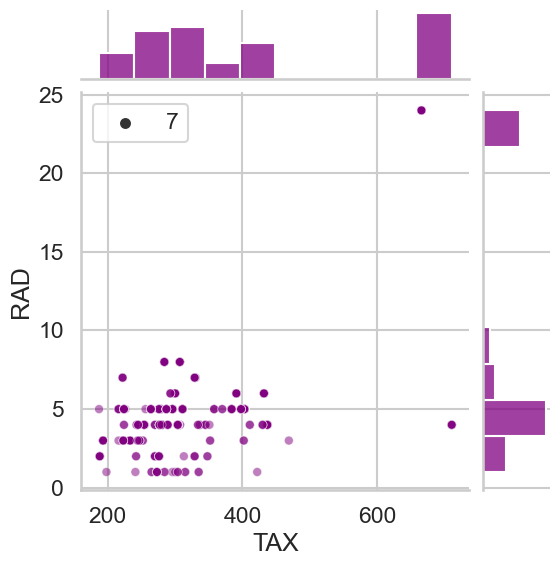

In [16]:
# using seaborn module
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['TAX'], y=data['RAD'], color='purple', size=7,joint_kws={'alpha':0.5})
plt.show()

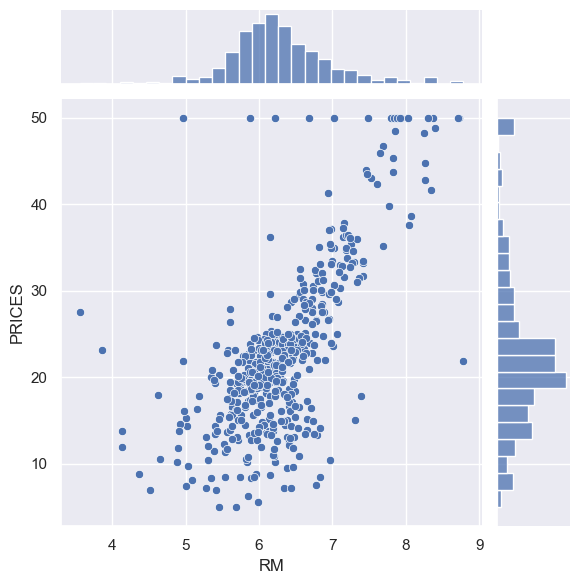

In [17]:
sns.set()
sns.jointplot(x=data['RM'],y=data['PRICES'], )
plt.show()

(506, 14)


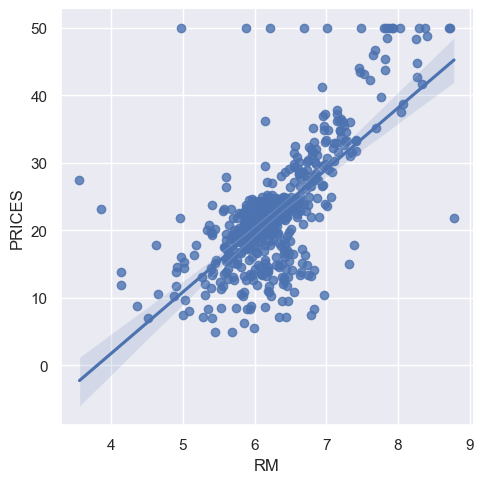

In [18]:
sns.lmplot(x='RM', y='PRICES', data=data)
print(data.shape)

## TESTING AND SPLITTING DATA

In [30]:
prices = data['PRICES']
features = data.drop('PRICES', axis=1)

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)



In [31]:
#running regression non training data
regr = LinearRegression()
regr.fit(X_train, y_train)

intercept = regr.intercept_
coef = pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])
print(intercept)
print(coef)

mean_square_train = regr.score(X_train, y_train)
mean_square_test = regr.score(X_test, y_test)
print(mean_square_train)

36.5330513828241
              coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626
0.750121534530608


## TRANSFORMING THE DATA FOR MORE ACCURACY



In [29]:
prices = np.log(data['PRICES'])
features = data.drop('PRICES', axis=1)

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

intercept = regr.intercept_
coef = pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])
print(intercept)
print(coef)

mean_square_train = regr.score(X_train, y_train)
mean_square_test = regr.score(X_test, y_test)
print(mean_square_train)


4.059943871775174
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390
0.7930234826697584


In [ ]:
x_inc_const = sns.add(X_train)
